In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get("http://naver.com")

In [3]:
driver.close()

In [4]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [5]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [7]:
gu_names = [option.get_attribute("value") for option in gu_list]

In [9]:
gu_names.remove('')

In [10]:
gu_names

['강릉시',
 '고성군',
 '동해시',
 '삼척시',
 '속초시',
 '양구군',
 '양양군',
 '영월군',
 '원주시',
 '인제군',
 '정선군',
 '철원군',
 '춘천시',
 '태백시',
 '평창군',
 '홍천군',
 '화천군',
 '횡성군']

In [11]:
element = driver.find_element_by_id('SIGUNGU_NM0')

In [14]:
element.send_keys(gu_names[0])

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=66.0.3359.139)
  (Driver info: chromedriver=2.38.552522 (437e6fbedfa8762dec75e2c5b3ddb86763dc9dcb),platform=Windows NT 10.0.16299 x86_64)


In [15]:
xpath = """//*[@id="searRgSelect"]/span"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [16]:
xpath = """//*[@id="glopopd_excel"]/span"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [17]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]/span"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    xpath = """//*[@id="glopopd_excel"]/span"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

HBox(children=(IntProgress(value=0, max=18), HTML(value='')))

In [21]:
from glob import glob
import pandas as pd

In [19]:
glob('../data/지역*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls']

In [20]:
station_file = glob('../data/지역*.xls')
station_file

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls']

In [22]:
tmp_raw = []

for file_name in station_file:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [23]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,강원도,회산주유소,강원도 강릉시 관솔길 27 (회산동),S-OIL,033-648-2480,Y,-,1521,1331,835
1,강원도,솔향주유소,강원 강릉시 공제로437번길 1 (홍제동),알뜰주유소,033-641-1771,Y,-,1523,1333,-
2,강원도,옥계(속초)주유소/충전소,강원도 강릉시 옥계면 동해고속도로 322,알뜰(ex),033-534-2100,N,-,1528,1330,-
3,강원도,kis정보통신(주)강릉(강릉방향)주유소,강원도 강릉시 성산면 영동고속도로 232-1,알뜰(ex),033-648-9559,N,-,1530,1335,-
4,강원도,송정주유소,강원도 강릉시 경강로 2395 (송정동),S-OIL,033-651-9771,Y,-,1534,1334,-
5,강원도,대성주유소,강원 강릉시 구정면 칠성로 187,S-OIL,033-643-1122,Y,-,1534,1334,840
6,강원도,(주)KIS 강릉(인천방향)주유소,강원도 강릉시 영동고속도로 231-1 강릉(인천방향)주유소,알뜰(ex),033-647-7112,N,-,1534,1339,-
7,강원도,강릉햇살주유소,강원도 강릉시 입암로 12 (입암동),S-OIL,033-648-1951,Y,-,1534,1334,-
8,강원도,청유주유소,강원도 강릉시 경강로 2228 (포남동),현대오일뱅크,033-648-1868,Y,-,1534,1334,-
9,강원도,강릉농협 성산주유소,강원도 강릉시 성산면 구산길 16,NH-OIL,033-641-9379,N,2000,1535,1335,840


In [24]:
station_raw.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 115
Data columns (total 10 columns):
지역       702 non-null object
상호       702 non-null object
주소       702 non-null object
상표       702 non-null object
전화번호     702 non-null object
셀프여부     702 non-null object
고급휘발유    702 non-null object
휘발유      702 non-null object
경유       702 non-null object
실내등유     702 non-null object
dtypes: object(10)
memory usage: 60.3+ KB


In [25]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,가격,상표,셀프,주소
0,회산주유소,1521,S-OIL,Y,강원도 강릉시 관솔길 27 (회산동)
1,솔향주유소,1523,알뜰주유소,Y,강원 강릉시 공제로437번길 1 (홍제동)
2,옥계(속초)주유소/충전소,1528,알뜰(ex),N,강원도 강릉시 옥계면 동해고속도로 322
3,kis정보통신(주)강릉(강릉방향)주유소,1530,알뜰(ex),N,강원도 강릉시 성산면 영동고속도로 232-1
4,송정주유소,1534,S-OIL,Y,강원도 강릉시 경강로 2395 (송정동)


In [26]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,회산주유소,1521,S-OIL,Y,강원도 강릉시 관솔길 27 (회산동),강릉시
1,솔향주유소,1523,알뜰주유소,Y,강원 강릉시 공제로437번길 1 (홍제동),강릉시
2,옥계(속초)주유소/충전소,1528,알뜰(ex),N,강원도 강릉시 옥계면 동해고속도로 322,강릉시
3,kis정보통신(주)강릉(강릉방향)주유소,1530,알뜰(ex),N,강원도 강릉시 성산면 영동고속도로 232-1,강릉시
4,송정주유소,1534,S-OIL,Y,강원도 강릉시 경강로 2395 (송정동),강릉시


In [27]:
stations['구'].unique()

array(['강릉시', '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군',
       '횡성군', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시'],
      dtype=object)

In [28]:
stations[stations['가격']=='-']

,Oil_store,가격,상표,셀프,주소,구
88,동광주유소,-,현대오일뱅크,N,강원 강릉시 강동면 임곡로 217,강릉시
89,SK신영주유소,-,SK에너지,N,강원 강릉시 독송길 120 (운산동),강릉시
25,광하주유소,-,GS칼텍스,N,강원도 정선군 정선읍 정선로 582,정선군
26,조양주유소,-,현대오일뱅크,N,강원도 정선군 정선읍 서동로 1348,정선군
82,명성주유소,-,S-OIL,Y,강원도 춘천시 후석로 396 (후평동),춘천시
83,SK에너지(주) 동국주유소,-,SK에너지,Y,강원 춘천시 소양로 206 (소양로1가),춘천시
15,대성주유소,-,SK에너지,N,강원 태백시 상장로 88 (황지동),태백시
16,어평주유소,-,GS칼텍스,N,강원도 태백시 태백산로 4162 (혈동),태백시
41,재산주유소,-,SK에너지,N,강원 평창군 용평면 평창대로 1737,평창군
42,오대산주유소,-,S-OIL,N,강원 평창군 대관령면 경강로 4543,평창군


In [29]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,회산주유소,1521,S-OIL,Y,강원도 강릉시 관솔길 27 (회산동),강릉시
1,솔향주유소,1523,알뜰주유소,Y,강원 강릉시 공제로437번길 1 (홍제동),강릉시
2,옥계(속초)주유소/충전소,1528,알뜰(ex),N,강원도 강릉시 옥계면 동해고속도로 322,강릉시
3,kis정보통신(주)강릉(강릉방향)주유소,1530,알뜰(ex),N,강원도 강릉시 성산면 영동고속도로 232-1,강릉시
4,송정주유소,1534,S-OIL,Y,강원도 강릉시 경강로 2395 (송정동),강릉시


In [30]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 108
Data columns (total 6 columns):
Oil_store    672 non-null object
가격           672 non-null object
상표           672 non-null object
셀프           672 non-null object
주소           672 non-null object
구            672 non-null object
dtypes: object(6)
memory usage: 36.8+ KB


In [31]:
stations['가격'] = [float(value) for value in stations['가격']]

In [32]:
stations.reset_index(inplace=True)
del stations['index']
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
Oil_store    672 non-null object
가격           672 non-null float64
상표           672 non-null object
셀프           672 non-null object
주소           672 non-null object
구            672 non-null object
dtypes: float64(1), object(5)
memory usage: 31.6+ KB


In [33]:
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,회산주유소,1521.0,S-OIL,Y,강원도 강릉시 관솔길 27 (회산동),강릉시
1,솔향주유소,1523.0,알뜰주유소,Y,강원 강릉시 공제로437번길 1 (홍제동),강릉시
2,옥계(속초)주유소/충전소,1528.0,알뜰(ex),N,강원도 강릉시 옥계면 동해고속도로 322,강릉시
3,kis정보통신(주)강릉(강릉방향)주유소,1530.0,알뜰(ex),N,강원도 강릉시 성산면 영동고속도로 232-1,강릉시
4,송정주유소,1534.0,S-OIL,Y,강원도 강릉시 경강로 2395 (송정동),강릉시


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

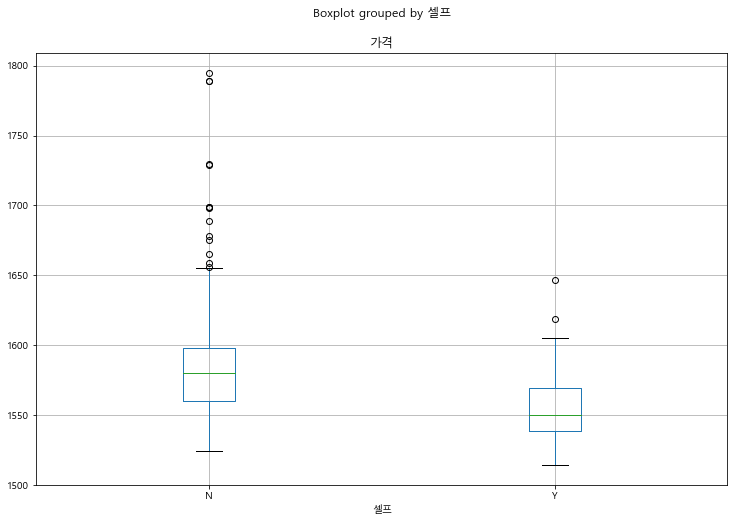

In [36]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

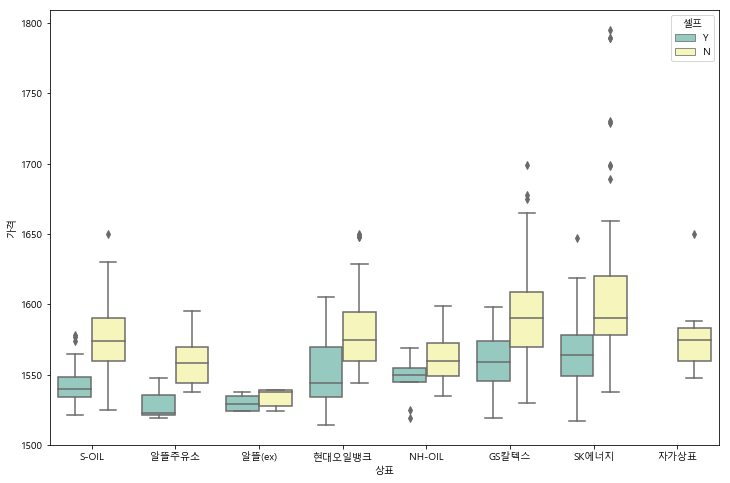

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

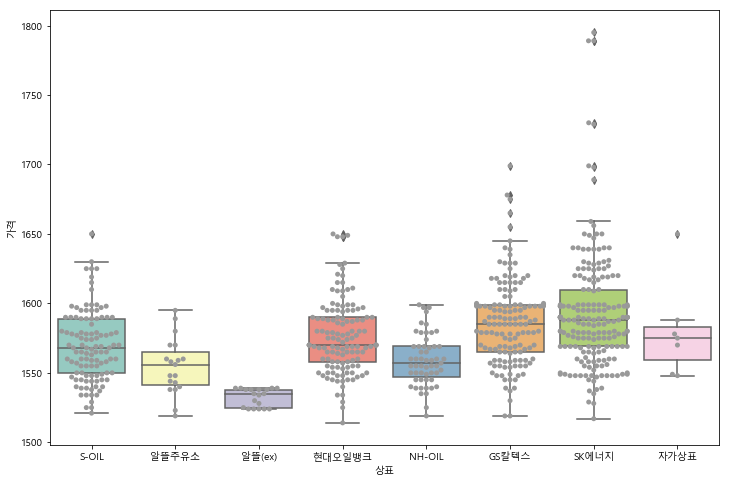

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

In [40]:
import json
import folium
import googlemaps
import warnings

warnings.simplefilter(action="ignore", category= FutureWarning)

In [43]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,가격,상표,셀프,주소,구
248,춘천제일주유소,1795.0,SK에너지,N,강원 춘천시 영서로 1923 (석사동),춘천시
671,단계주유소,1789.0,SK에너지,N,강원도 원주시 서원대로 154 (단계동),원주시
399,SK네스웍스(주)대호주유소,1789.0,SK에너지,N,강원 횡성군 횡성읍 횡성로 368,횡성군
166,신철원주유소,1730.0,SK에너지,N,강원 철원군 갈말읍 명성로 179,철원군
352,무궁화주유소,1729.0,SK에너지,N,강원 홍천군 홍천읍 설악로 1277,홍천군
670,행운주유소,1699.0,GS칼텍스,N,강원도 원주시 행구로 253 (행구동),원주시
247,동광(샛별),1699.0,SK에너지,N,강원 춘천시 춘천로 412 (후평동),춘천시
351,수산주유소,1698.0,SK에너지,N,강원 홍천군 서면 한서로 754,홍천군
669,SK에너지(주) 삼한주유소,1689.0,SK에너지,N,강원도 원주시 북원로 2509 (우산동),원주시
87,홍제주유소,1678.0,GS칼텍스,N,강원 강릉시 경강로 1850 (홍제동),강릉시


In [44]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,가격,상표,셀프,주소,구
305,장남에너지self,1514.0,현대오일뱅크,Y,강원 홍천군 두촌면 장남길 81,홍천군
167,개나리,1517.0,SK에너지,Y,강원 춘천시 퇴계로 231 (석사동),춘천시
168,춘천시티주유소,1519.0,GS칼텍스,Y,강원도 춘천시 동내면 세실로 20 춘천시티주유소,춘천시
169,춘천강동농협주유소,1519.0,NH-OIL,Y,강원도 춘천시 동면 춘천로 469,춘천시
170,붕붕붕주유소,1519.0,GS칼텍스,Y,강원도 춘천시 공지로 156-3 (석사동),춘천시
171,새춘천주유소,1519.0,알뜰주유소,Y,강원 춘천시 동내면 세실로 38,춘천시
0,회산주유소,1521.0,S-OIL,Y,강원도 강릉시 관솔길 27 (회산동),강릉시
1,솔향주유소,1523.0,알뜰주유소,Y,강원 강릉시 공제로437번길 1 (홍제동),강릉시
564,치악(춘천)방향주유소,1524.0,알뜰(ex),Y,강원도 원주시 신림면 다리실2길 32,원주시
563,치악(부산방향)주유소,1524.0,알뜰(ex),N,강원 원주시 신림면 치악로 416,원주시


In [45]:
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)

In [46]:
gu_data

,가격
구,
강릉시,1572.920455
고성군,1571.000000
동해시,1557.939394
삼척시,1578.645161
속초시,1560.807692
양구군,1599.222222
양양군,1589.947368
영월군,1586.296296
원주시,1571.082569


In [48]:
gu_data.index

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시', '인제군',
       '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군'],
      dtype='object', name='구')

In [55]:
geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

In [56]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,가격,상표,셀프,주소,구
248,춘천제일주유소,1795.0,SK에너지,N,강원 춘천시 영서로 1923 (석사동),춘천시
671,단계주유소,1789.0,SK에너지,N,강원도 원주시 서원대로 154 (단계동),원주시
399,SK네스웍스(주)대호주유소,1789.0,SK에너지,N,강원 횡성군 횡성읍 횡성로 368,횡성군
166,신철원주유소,1730.0,SK에너지,N,강원 철원군 갈말읍 명성로 179,철원군
352,무궁화주유소,1729.0,SK에너지,N,강원 홍천군 홍천읍 설악로 1277,홍천군
670,행운주유소,1699.0,GS칼텍스,N,강원도 원주시 행구로 253 (행구동),원주시
247,동광(샛별),1699.0,SK에너지,N,강원 춘천시 춘천로 412 (후평동),춘천시
351,수산주유소,1698.0,SK에너지,N,강원 홍천군 서면 한서로 754,홍천군
669,SK에너지(주) 삼한주유소,1689.0,SK에너지,N,강원도 원주시 북원로 2509 (우산동),원주시
87,홍제주유소,1678.0,GS칼텍스,N,강원 강릉시 경강로 1850 (홍제동),강릉시


In [57]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,가격,상표,셀프,주소,구
305,장남에너지self,1514.0,현대오일뱅크,Y,강원 홍천군 두촌면 장남길 81,홍천군
167,개나리,1517.0,SK에너지,Y,강원 춘천시 퇴계로 231 (석사동),춘천시
168,춘천시티주유소,1519.0,GS칼텍스,Y,강원도 춘천시 동내면 세실로 20 춘천시티주유소,춘천시
169,춘천강동농협주유소,1519.0,NH-OIL,Y,강원도 춘천시 동면 춘천로 469,춘천시
170,붕붕붕주유소,1519.0,GS칼텍스,Y,강원도 춘천시 공지로 156-3 (석사동),춘천시
171,새춘천주유소,1519.0,알뜰주유소,Y,강원 춘천시 동내면 세실로 38,춘천시
0,회산주유소,1521.0,S-OIL,Y,강원도 강릉시 관솔길 27 (회산동),강릉시
1,솔향주유소,1523.0,알뜰주유소,Y,강원 강릉시 공제로437번길 1 (홍제동),강릉시
564,치악(춘천)방향주유소,1524.0,알뜰(ex),Y,강원도 원주시 신림면 다리실2길 32,원주시
563,치악(부산방향)주유소,1524.0,알뜰(ex),N,강원 원주시 신림면 치악로 416,원주시


In [58]:
gmap_key = "your_key" 
gmaps = googlemaps.Client(key=gmap_key)

In [59]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

,Oil_store,가격,상표,셀프,주소,구,lat,lng
248,춘천제일주유소,1795.0,SK에너지,N,강원 춘천시 영서로 1923 (석사동),춘천시,37.847197,127.754981
671,단계주유소,1789.0,SK에너지,N,강원도 원주시 서원대로 154 (단계동),원주시,37.344095,127.928422
399,SK네스웍스(주)대호주유소,1789.0,SK에너지,N,강원 횡성군 횡성읍 횡성로 368,횡성군,37.485926,127.984424
166,신철원주유소,1730.0,SK에너지,N,강원 철원군 갈말읍 명성로 179,철원군,38.147579,127.304828
352,무궁화주유소,1729.0,SK에너지,N,강원 홍천군 홍천읍 설악로 1277,홍천군,37.668812,127.850126
670,행운주유소,1699.0,GS칼텍스,N,강원도 원주시 행구로 253 (행구동),원주시,37.343150,127.983899
247,동광(샛별),1699.0,SK에너지,N,강원 춘천시 춘천로 412 (후평동),춘천시,37.889750,127.752276
351,수산주유소,1698.0,SK에너지,N,강원 홍천군 서면 한서로 754,홍천군,37.657255,127.613972
669,SK에너지(주) 삼한주유소,1689.0,SK에너지,N,강원도 원주시 북원로 2509 (우산동),원주시,37.368383,127.940451
87,홍제주유소,1678.0,GS칼텍스,N,강원 강릉시 경강로 1850 (홍제동),강릉시,37.745974,128.872320


In [60]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

,Oil_store,가격,상표,셀프,주소,구,lat,lng
305,장남에너지self,1514.0,현대오일뱅크,Y,강원 홍천군 두촌면 장남길 81,홍천군,37.903973,128.039658
167,개나리,1517.0,SK에너지,Y,강원 춘천시 퇴계로 231 (석사동),춘천시,37.856078,127.744170
168,춘천시티주유소,1519.0,GS칼텍스,Y,강원도 춘천시 동내면 세실로 20 춘천시티주유소,춘천시,37.859315,127.760359
169,춘천강동농협주유소,1519.0,NH-OIL,Y,강원도 춘천시 동면 춘천로 469,춘천시,37.895824,127.760379
170,붕붕붕주유소,1519.0,GS칼텍스,Y,강원도 춘천시 공지로 156-3 (석사동),춘천시,37.860002,127.745197
171,새춘천주유소,1519.0,알뜰주유소,Y,강원 춘천시 동내면 세실로 38,춘천시,37.860724,127.759452
0,회산주유소,1521.0,S-OIL,Y,강원도 강릉시 관솔길 27 (회산동),강릉시,37.739312,128.870105
1,솔향주유소,1523.0,알뜰주유소,Y,강원 강릉시 공제로437번길 1 (홍제동),강릉시,37.746133,128.867616
564,치악(춘천)방향주유소,1524.0,알뜰(ex),Y,강원도 원주시 신림면 다리실2길 32,원주시,37.256897,128.048299
563,치악(부산방향)주유소,1524.0,알뜰(ex),N,강원 원주시 신림면 치악로 416,원주시,37.253764,128.048430


In [61]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map